## PIPELINE | DATASET IRIS
#### Compilação dos conceitos de SOM e exemplos em python em um problema conhecido: base de dados Iris.

In [1]:
# Importando as bibliotecas necessárias para análise dos dados
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from minisom import MiniSom
import som

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import sys

### Importação do conjunto de dados através da biblioteca Scikit-Learn

In [2]:
# Importando o dataset iris 
iris = load_iris()
#iris

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Pré-processamento dos dados carregados

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Substituição dos valores [0, 1, 2] por suas respectivas espécies [Setosa, Versicolor, Virginica]
def flower_species(x):
    if x == 0:
        return "Setosa"
    elif x == 1:
        return "Versicolor"
    elif x == 2:
        return "Virginica"
 
df['species'] = iris.target
df['species'] = df['species'].map(flower_species)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Análise exploratória dos dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### O conjunto de dados é composto por quatro colunas com dados numéricos (tamanhos das pétalas e sépalas) e uma coluna categóricas (espécie das flores). Além disso, pode-se observar que não existem valores nulos.

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### A partir dessas informações, tem-se uma pequena visualização dos dados carregados.

In [9]:
# Contagem das espécies para cada categoria
df['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

#### A mesma quantidade é observada para cada uma das espécies. Isso indica um conjunto de dados equilibrado.

In [10]:
# Verificação de linhas duplicadas
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,Virginica


#### Há a existência de uma linha duplicada no conjunto de dados. Porém, se for excluída, haverá um desequilíbrio nos dados.

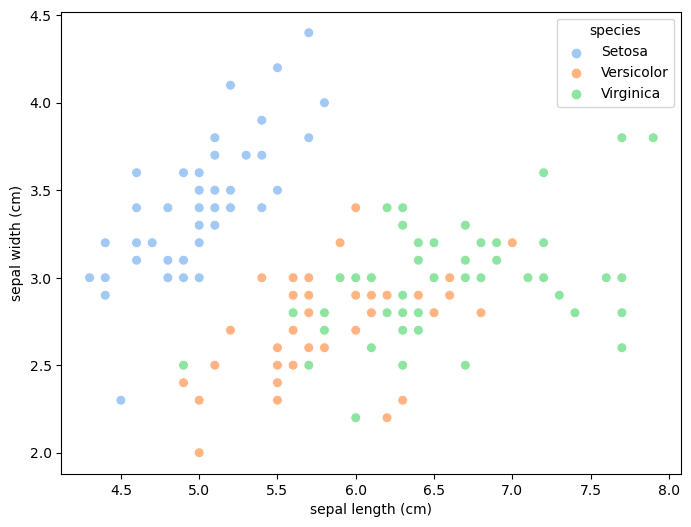

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', s=50, palette='pastel');

#### Através do gráfico de dispersão relacionando o comprimento e a largura da sépala, não é possível identificar claramente como as flores poderiam ser classificadas.

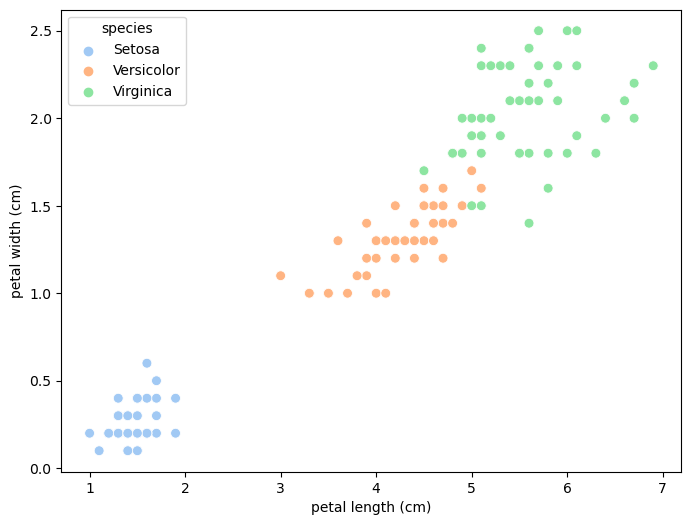

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', s=50, palette='pastel');

#### Agora analisando o comprimento e a largura da pétala, é possível identificar que se o comprimento da pétala for menor que 2 cm ou a largura da pétala for menor que 0,8, a flor é de espécie Setosa. No caso das espécies Versicolor e Virginica, há uma pequena sobreposição dos dados que impede a diferenciação.

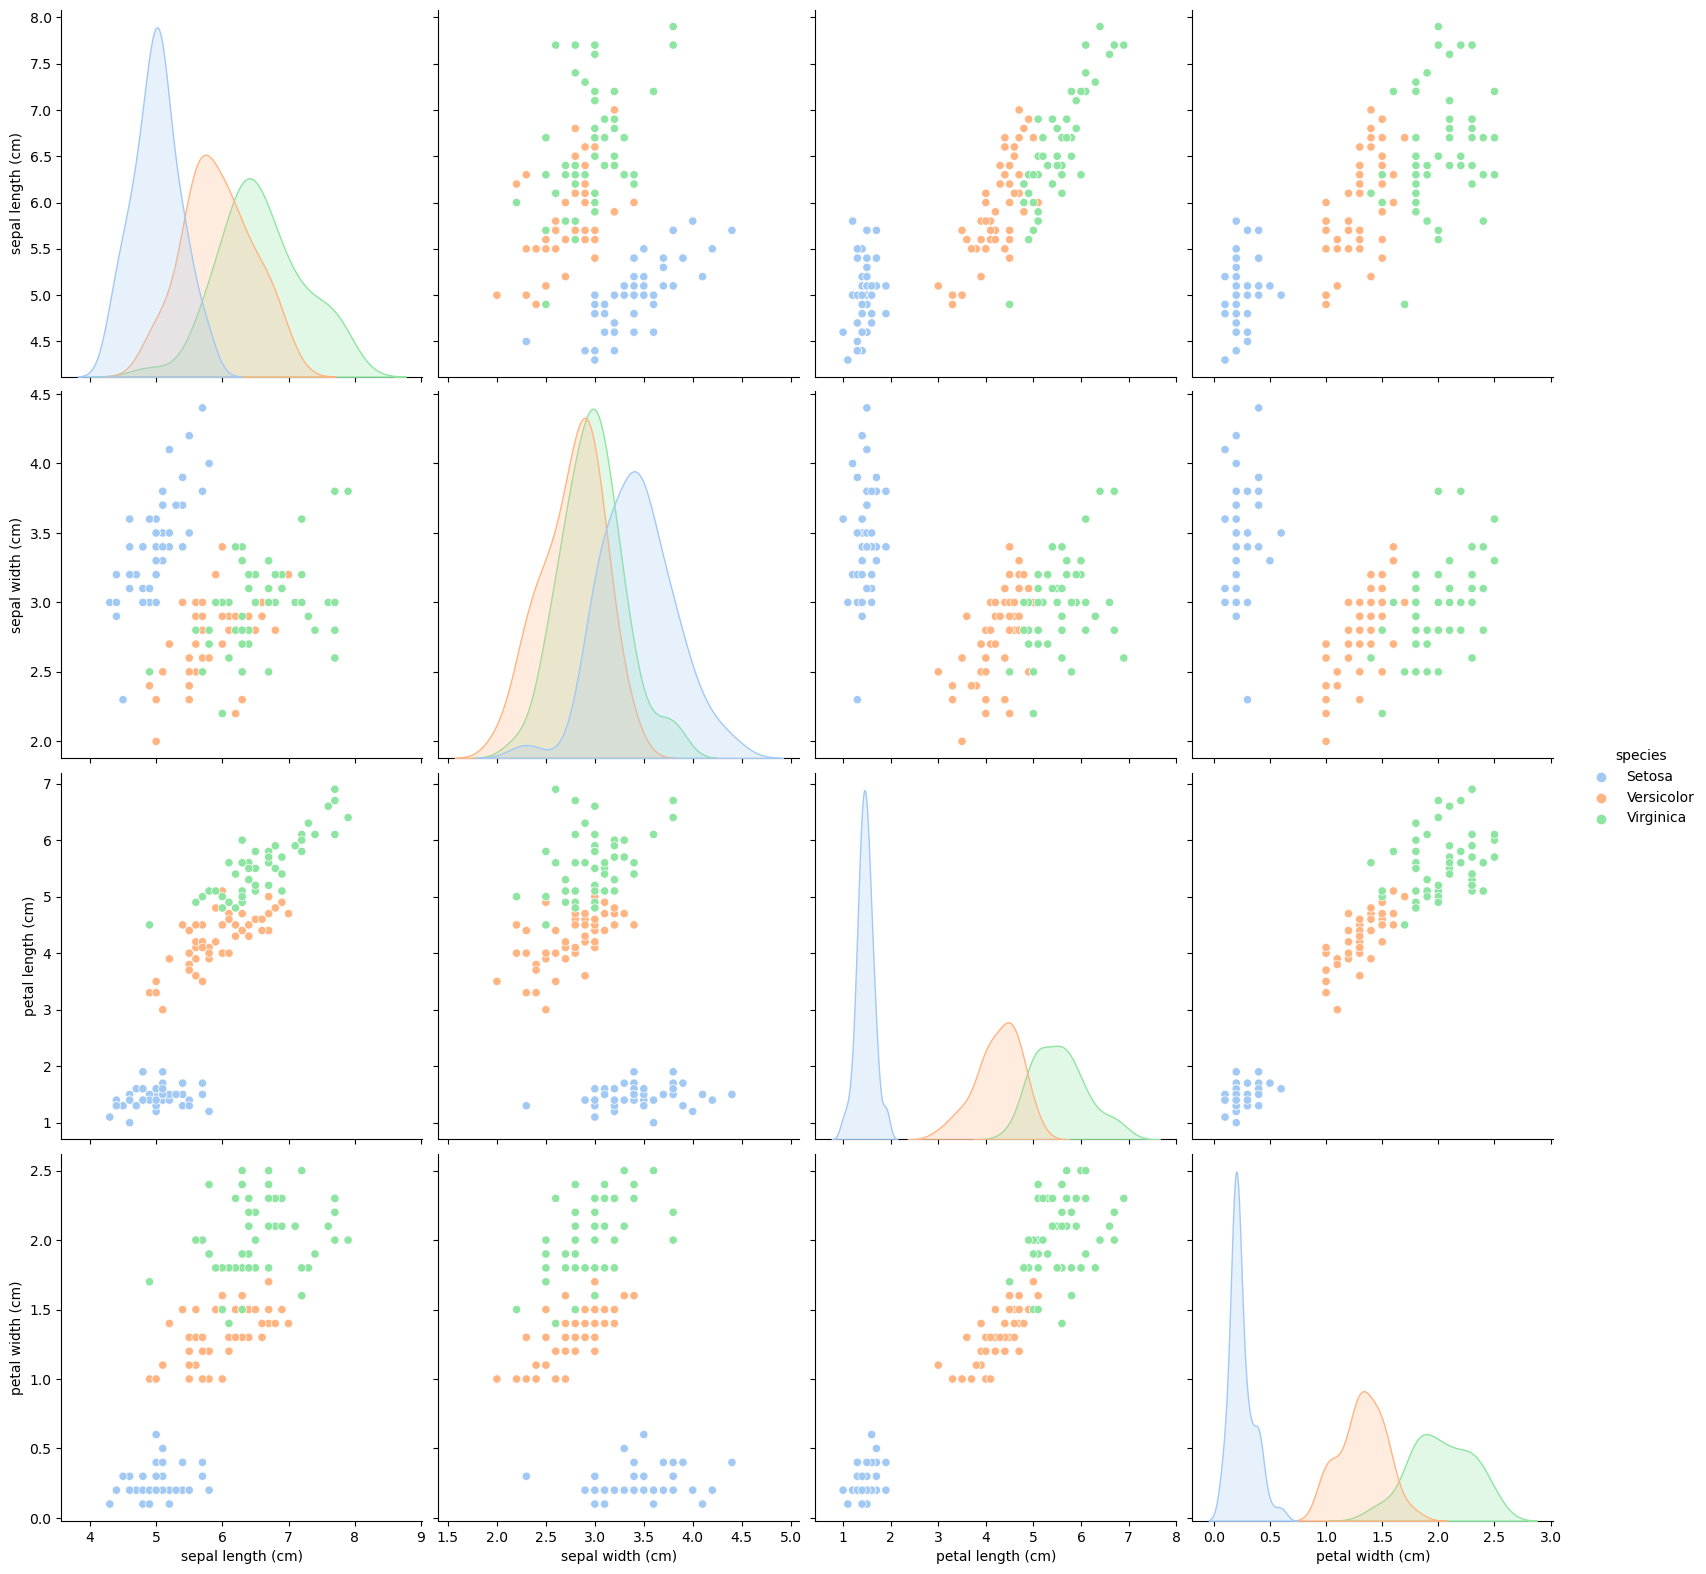

In [13]:
sns.pairplot(df, hue='species', height=4, palette='pastel')

#### O gráfico de pares, em questão, permite a visualização de informações que podem ser úteis para a análise.

C:\Users\btieppo\AppData\Local\Temp\ipykernel_8448\2863914289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


[]

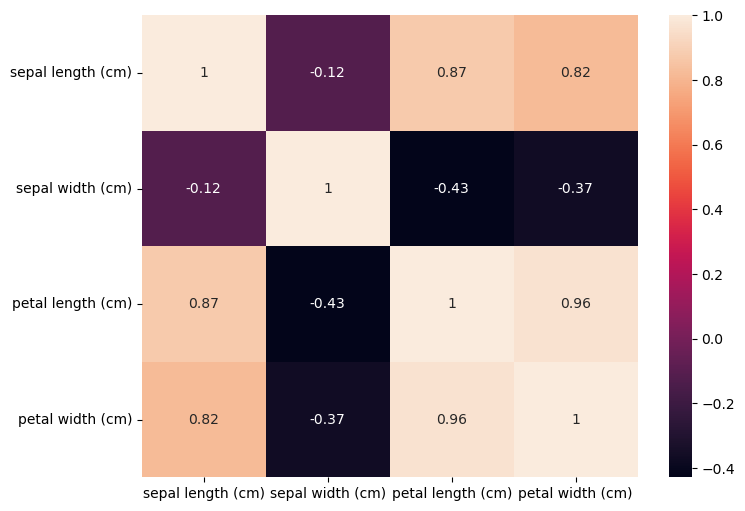

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.plot()

#### Observando as correlações das variáveis, nota-se que comprimento e a largura das pétalas estão altamente correlacionados.

In [15]:
df.groupby('species').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
Setosa                 5.006    5.0            3.428    3.4             1.462   
Versicolor             5.936    5.9            2.770    2.8             4.260   
Virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
Setosa       1.50            0.246    0.2  
Versicolor   4.35            1.326    1.3  
Virginica    5.55            2.026    2.0

#### Para encontrar informações sobre os parâmetros contidos no conjunto de dados, foi feito um agrupamento por espécie e os cálculos ds média e mediana.

### Analytics com diferentes classificadores

#### Teste de classificadores

In [16]:
x = iris.data
y = iris.target

In [17]:
# Divisão do conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
# Lista de classificadores e suas respectivas funções do Scikit-Learn
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [19]:
# Definição da função que receberá o zip dos classificadores e os dados de treino e teste, ou seja, definição do pipeline
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [20]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [21]:
result = classifier(zipped_clf, x_train, y_train, x_test, y_test)

Validation result for Logistic Regression
LogisticRegression()
accuracy score: 98.00%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 98.00%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 98.00%
Validation result for SVM
LinearSVC()
accuracy score: 96.00%


In [22]:
acc = {}
for i in range(len(result)):
    acc[result[i][0]] = result[i][1]*100
    print('algorithm = ',result[i][0], '\naccuracy =',result[i][1]*100)

algorithm =  Logistic Regression 
accuracy = 98.0
algorithm =  KNN 
accuracy = 98.0
algorithm =  Random Forest 
accuracy = 98.0
algorithm =  SVM 
accuracy = 96.0


### SOM

#### Dados para treinamento

In [23]:
data = iris.data

# Normalização do dados
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

In [24]:
df['class'] = iris.target

#### Para inicialização de um objeto da biblioteca Minisom é necessário atribuír os parametros uma variável.

In [25]:
# Inicialização
som3x3 = MiniSom(x= 3, y = 3, input_len = 4, sigma=3, learning_rate=0.5, neighborhood_function='triangle', random_seed=10)

C:\Users\btieppo\Miniconda3\lib\site-packages\minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


In [26]:
# Treinamento
som3x3.pca_weights_init(data)
print("Training...3x3")
som3x3.train_batch(data, 1000, verbose=True)

Training...3x3
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.03563431447856


#### Hitmap

In [27]:
t = np.zeros(len(iris.target), dtype=int)

t[iris.target == 0] = 0
t[iris.target == 1] = 1
t[iris.target == 2] = 2

markers = ['o','s','D']
colors = ['r','g','b']

red_patch = mpatches.Patch(color='red', label='setosa')
blue_patch = mpatches.Patch(color='blue', label='versicolor')
green_patch = mpatches.Patch(color='green', label='virginica')

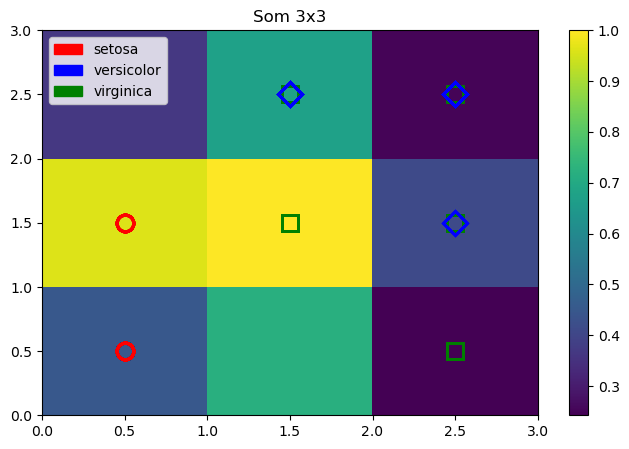

In [28]:
plt.figure(figsize=(8,5))
plt.title('Som 3x3')
plt.pcolor(som3x3.distance_map().T) 
plt.colorbar()

for cnt,xx in enumerate(data):
    w = som3x3.winner(xx) # neurônio vencedor
    plt.plot(w[0]+.5,w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
    
plt.axis([0,som3x3.get_weights().shape[0],0,som3x3.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch,green_patch])
plt.show()

#### Heatmap

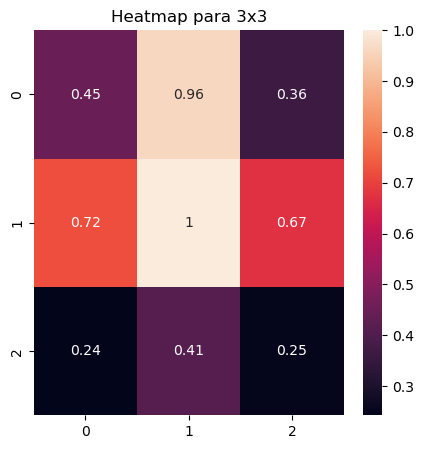

In [29]:
plt.figure(figsize=(5,5))
plt.title('Heatmap para 3x3')
sns.heatmap(som3x3.distance_map(), annot=True)
plt.show()

#### Erro de quantização

iteration=9999 status=100.00% error=0.03406987120149433

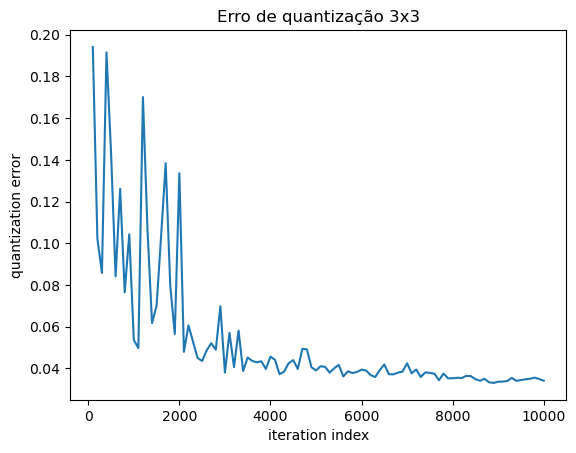

In [30]:
som3x3.pca_weights_init(data)
max_iter = 10000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data))
    som3x3.update(data[rand_i], som3x3.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som3x3.quantization_error(data)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')

plt.title('Erro de quantização 3x3')
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.show()

In [31]:
class_assignments = som3x3.labels_map(data, df['class'])

def classify(som, data, class_assignments):
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som3x3.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, df['class'])

som3x3.pca_weights_init(X_train)
som3x3.train_random(X_train, 5000, verbose=False)
class_assignments = som3x3.labels_map(X_train, y_train)

print(classification_report(y_test, classify(som3x3, X_test, class_assignments)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.82      0.82        11
           2       0.88      0.88      0.88        16

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38

